# Step 0: Set it up
- Import the libraries.
- Set some pandas styling
- Upload and read the data

In [1]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# pandas styling
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 10

# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print("Now, you're ready for step one")

Now, you're ready for step one


# Step 1: Discovering the datasets
Check out the overall shape, size, and content of the dataset.

In [2]:
# shape of the data
train.shape , test.shape 

((79023, 76), (24353, 75))

In [3]:
train.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732
5,ID_-0.510_29.290_2019_05,-0.51000,29.29000,2019,5,0.00029,0.87171,0.00024,0.22766,-13.45369,...,5530.35455,49846.00101,4495.30136,7.55614,0.25023,30.12840,37.00702,-137.38872,21.15782,4.31082
6,ID_-0.510_29.290_2019_06,-0.51000,29.29000,2019,6,-0.00029,0.79196,-0.00023,0.11940,72.19865,...,4378.61465,58804.27656,3537.05066,10.49311,0.24083,4.58537,30.49154,-128.19634,21.72120,4.26933
7,ID_-0.510_29.290_2019_07,-0.51000,29.29000,2019,7,-0.00002,0.97631,-0.00002,0.10680,-100.95605,...,3468.92415,63697.00727,2597.07156,20.53360,0.25017,16.37483,35.84025,-122.25070,20.43201,4.25136
8,ID_-0.510_29.290_2019_08,-0.51000,29.29000,2019,8,-0.00011,0.79694,-0.00010,0.16497,-40.17907,...,3160.26467,67222.55616,2530.85148,24.25393,0.26054,-12.02175,42.68879,-114.29637,22.36560,4.28194
9,ID_-0.510_29.290_2019_09,-0.51000,29.29000,2019,9,0.00006,0.99854,0.00001,0.15773,-100.10874,...,4141.07334,60298.71797,3510.29365,13.81338,0.28929,-66.25839,28.59621,-105.68718,21.08402,4.35293


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>For now, we have 75 feature plus, our target, `emissions`<p>
<p style="color: #fc0000;">And, I need to do some research to understand what these features mean. But now, I want to check years in both datasets and the emissions in the train dataset.</p>
</div>

In [4]:
# Comparing year in train vs. test datasets
year_stats = pd.concat([
    train['year'].describe(), 
    test['year'].describe()], 
    axis=1)
year_stats.columns = ['years in train', 'years in test']
year_stats

,years in train,years in test
count,79023.00000,24353.00000
mean,2020.00000,2022.00000
std,0.81650,0.00000
min,2019.00000,2022.00000
25%,2019.00000,2022.00000
50%,2020.00000,2022.00000
75%,2021.00000,2022.00000
max,2021.00000,2022.00000


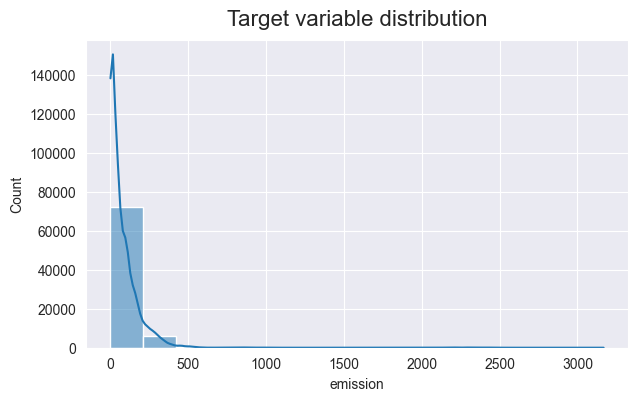

None

10.173825825101622

In [5]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (7, 4))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 16)
display(plt.show(), train.emission.skew())

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">

The target variable is **skewed to the right** with a a degree of ~7.


**Some of the techniques used to handle skewness include:**
* Log transform
* Box-cox transform
* Square root transform

</div>

# Step 2: Missing values and outliers
See how many missing values and outliers are there, then put some suggestions on how to handle them in the modeling phase.

### 2.1 Missing Values

In [6]:
# my fav missing values functions
def get_missing_value_counts(data_frame):
    missing_counts = data_frame.isnull().sum()
    missing_percentage = (missing_counts / len(data_frame)) * 100  # Calculate percentage
    missing_data = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    return missing_data

missing_values_table = get_missing_value_counts(train)
missing_values_table

,Missing Values,Percentage
SulphurDioxide_SO2_column_number_density,14609,18.48702
SulphurDioxide_SO2_column_number_density_amf,14609,18.48702
SulphurDioxide_SO2_slant_column_number_density,14609,18.48702
SulphurDioxide_cloud_fraction,14609,18.48702
SulphurDioxide_sensor_azimuth_angle,14609,18.48702
...,...,...
Cloud_surface_albedo,484,0.61248
Cloud_sensor_azimuth_angle,484,0.61248
Cloud_sensor_zenith_angle,484,0.61248
Cloud_solar_azimuth_angle,484,0.61248


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">

**Suggestions on how to handle missing values:**
* Fill in missing values with mode, mean, median..
* Drop Missing datapoints with missing values
* Fill in with a large number e.g -999999

</div>

### 2.2 Outliers
Outliers are those data points which differ significantly from other observations present in given dataset.

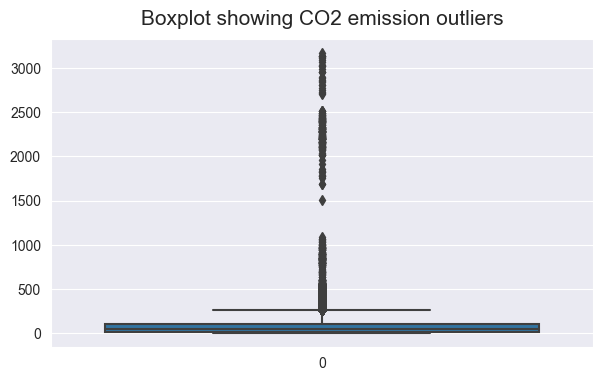

In [7]:
# Plotting boxplot for the CO2 emissions
plt.figure(figsize = (7, 4))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">

**Suggestions on how to handle outliers:**
* Transforming the outliers by scaling - log transformation, box-cox transformation ...
* Dropping outliers
* Imputation by replacing outliers with mean, median ...

</div>

# Step 3: Features in-depth look
It's a mix of univariate and bivariate analysis by which we can have a clear understanding of the data.

### 3.1 Year

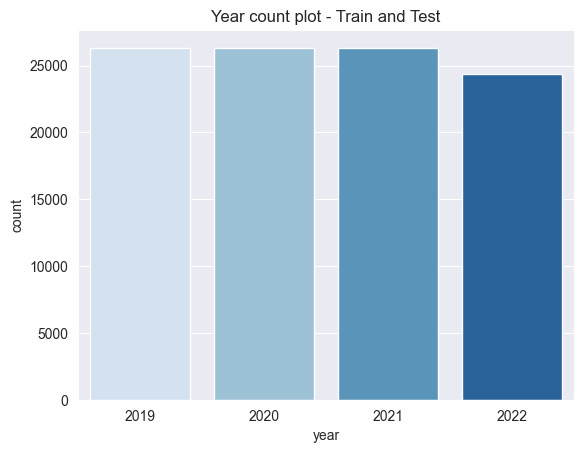

In [8]:
# Year countplot

# Combine train and test data
combined_data = pd.concat([train, test])

# Plot the combined data
sns.countplot(x='year', data=combined_data, palette='Blues')
plt.title('Year count plot - Train and Test')
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">

* The number of observations of CO2 emissions are the same across the years (2019, 2020, 2021)

* Year 2022 (in the test set) has fewer number of observations

</div>

### 3.2 Week

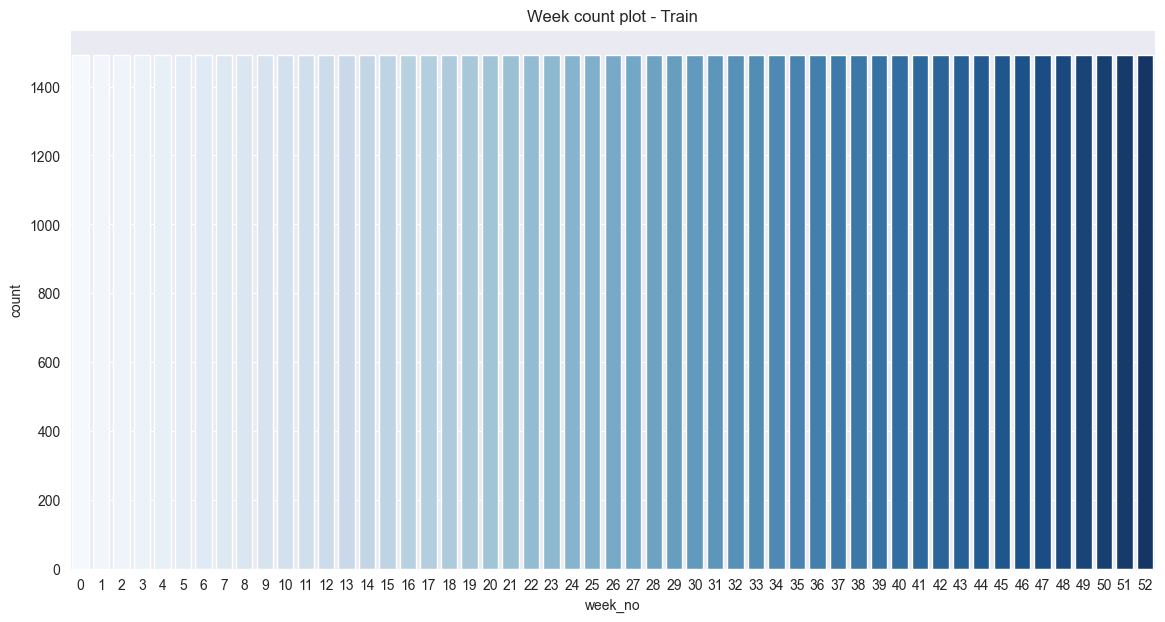

In [9]:
# Week countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'week_no', data = train, palette='Blues')
plt.title('Week count plot - Train')
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">

The number of observations of CO2 emissions are relatively the same across the weeks

</div>

# Step 4: Correlations
Correlation will help us find relationships between variables and identify which ones are important for further analysis.

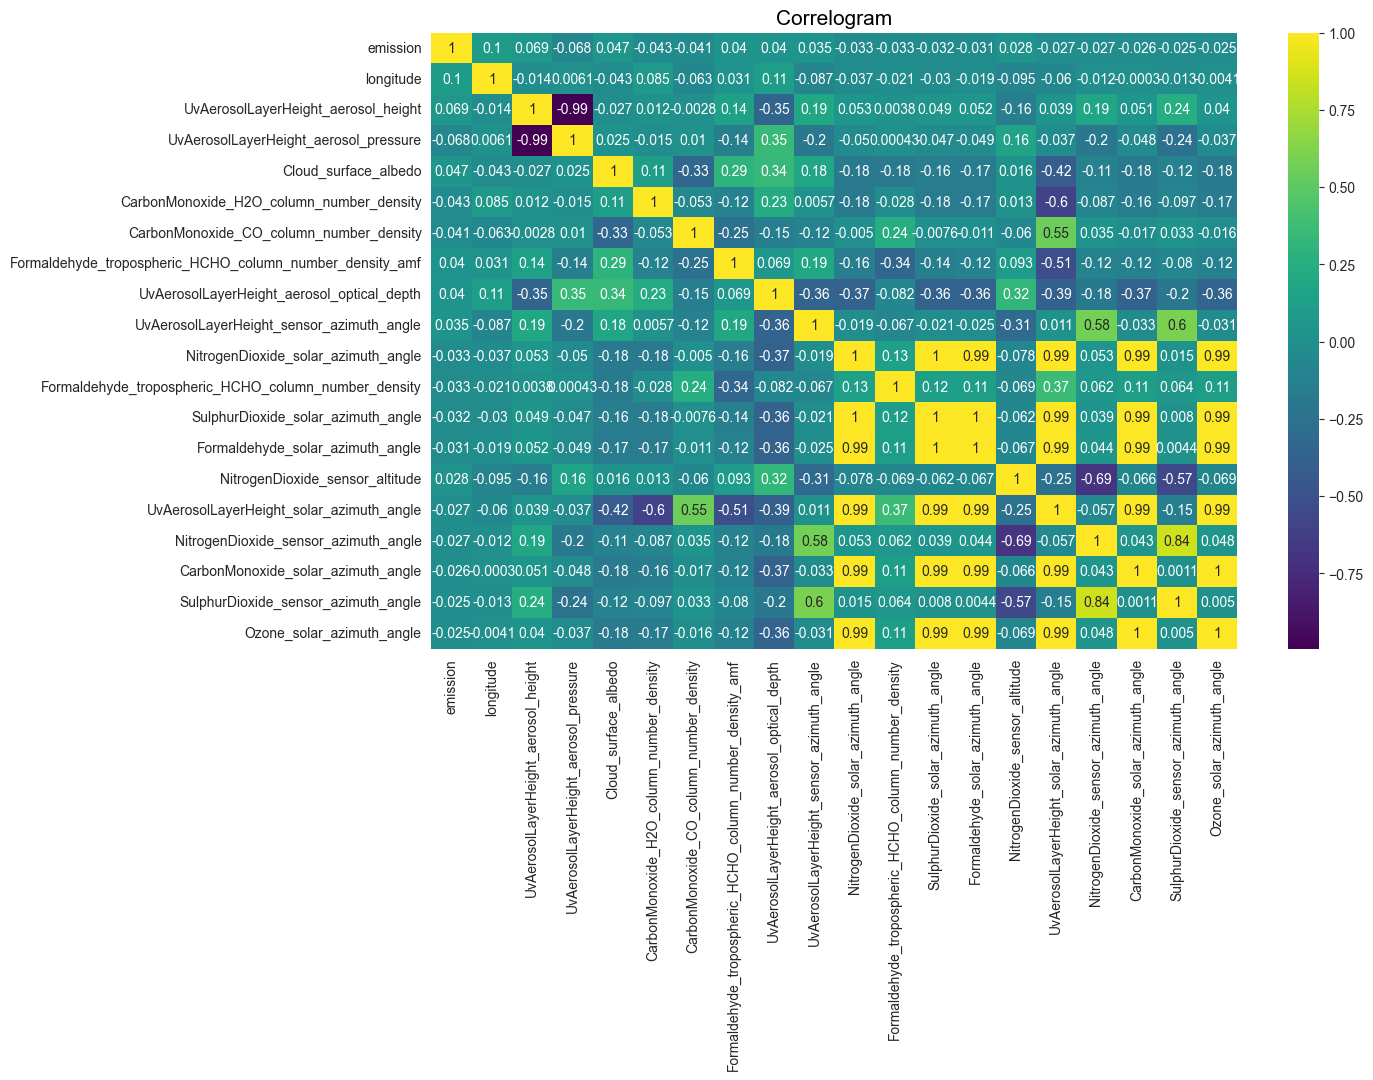

In [10]:
# Calculate correlation matrix
df_train = train.drop(['ID_LAT_LON_YEAR_WEEK'],axis=1)

# Top 20 correlated features to the target
top20_corrs = abs(df_train.corr()['emission']).sort_values(ascending = False).head(20)

# Quantify correlations between features
corr = df_train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='viridis', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'black')
plt.show()

# Step 5: Timeseries visualization
Time series visualization is important because it helps us understand trends, anomalies, and patterns in time-based data.

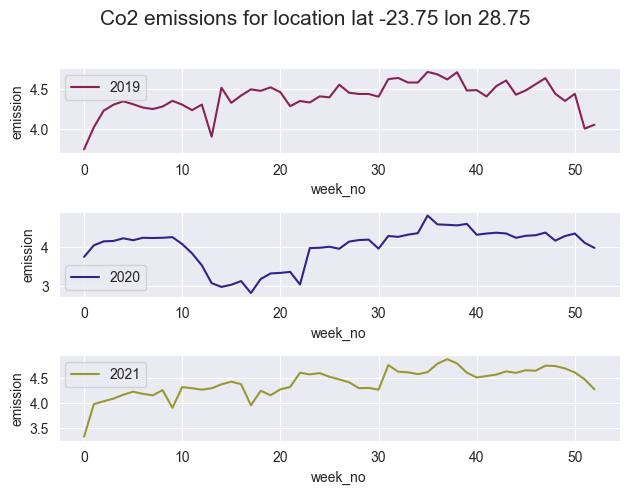

In [11]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -0.510) & (train.longitude == 29.290)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 1)
fig.suptitle('Co2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['#882255','#332288', '#999933' , 'orangered']):
  df = sample_loc[sample_loc.year == year]
  sns.lineplot(x=df.week_no,y= df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
Have seen the cyclical nature of the data? Now it's modeling time!

</div>

# Next Steps
- Feature Engineering
- Modeling